## Food Scarcity

In [1]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
#
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Dante Osbourne
* Dylan Porter

**Course:** DAAN 897– Deep Learning (Spring, 2024)

### Problem Statement
* As our planet's climate changes over time, food availability will be certainly impacted. This project aims to use deep learning algorithms in conjunction with data on climate change and crop yields to predict future food scarcity.
    
    
    
* **Keywords:** Food Scarcity, Food Scarcity Prediction,Climate Change 
	

### Data Collection
* Source(url): https://www.kaggle.com/datasets/goyaladi/climate-insights-dataset
* Short Description : Collection of various climate related data for various countries such as temperature, CO2 Emissions, Precipitation, etc.

* Keywords: climate insights, climate change, temperature, weather



* Source(url): https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset
* Short Description : Collection of crop yield data and surrounding factors such as average rainfall, average temperature by location

* Keywords: crop yields, temperature, pesticides 

### Required packages

* Keras
* Pandas
* Numpy
* matplotlib
* scikit-learn
*kerastuner


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, InputLayer
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from kerastuner import RandomSearch

C:\Users\dazzi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\dazzi\AppData\Local\Temp\ipykernel_13752\1112039909.py:12: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


### Data Preprocessing

Below are the steps we took to preprocess the data for model consumption
* Load the respective datasets into data frames
* Perform basic exploration on the data to see datatypes, check for empty values, check for duplicates, and gather descriptive statistics.
* Examine each data set and check uniqueness for each column
* Extract the year from the date column in the climate insights dataset as that will be needed for proper aggregation
* Detect and remove outliers in the respective datasets to minimize errors upon modeling
* Generate histograms and correlation matrixes of each respective dataset to better understand the data
* Remove irrelevant columns in the respective datasets
* Aggregate the climate insights dataset by year as the crop yield dataset is yearly


In [116]:
# Read in both datasets into dataframes
climate_change_df = pd.read_csv('./data/climate_change_data.csv')
yield_df = pd.read_csv('./data/yield_df.csv')

In [117]:
# Convert the Date in the climate_change_data.csv to just the year for formatting and eventual data merging
climate_change_df['Date'] = pd.to_datetime(climate_change_df['Date'], errors='coerce')
climate_change_df['Year'] = climate_change_df['Date'].dt.year

In [118]:
#basic exploration of the climate change dataset
climate_change_df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000


In [119]:
#descriptive statistics of the climate change dataset
climate_change_df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066,2010.997900
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648,6.633634
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732,2000.000000
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733,2005.000000
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787,2011.000000
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260,2017.000000
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664,2022.000000


In [133]:
climate_change_df.groupby('Country').mean()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year
Country,,,,,,,
Afghanistan,14.730345,403.029928,0.121724,47.152730,49.658014,23.858839,2009.631579
Albania,15.646637,403.086827,-0.251437,56.265142,54.208546,25.883135,2012.214286
Algeria,14.496989,401.639539,-0.343974,46.274362,48.237590,20.667563,2010.767442
American Samoa,15.895872,392.449374,0.156509,48.997182,53.647845,23.747529,2010.863636
Andorra,15.074974,410.238930,-0.030364,50.296133,47.764732,23.269450,2010.434783
...,...,...,...,...,...,...,...
Wallis and Futuna,14.827670,395.606024,-0.005426,44.844348,43.899724,28.297726,2010.054054
Western Sahara,15.386609,384.047327,0.021748,56.078378,47.417445,27.933374,2011.400000
Yemen,15.140053,392.016930,0.099056,49.923319,47.415821,22.066149,2010.735294


In [120]:
#empty check
climate_change_df.isnull().sum(axis = 0)

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
Year              0
dtype: int64

In [121]:
#duplicate check
climate_change_df.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [122]:
i = 0
for col in climate_change_df.columns:
    print(col,'has',len(np.unique(climate_change_df.iloc[:,i])),'unique values')
    i+=1

Date has 10000 unique values
Location has 7764 unique values
Country has 243 unique values
Temperature has 10000 unique values
CO2 Emissions has 10000 unique values
Sea Level Rise has 10000 unique values
Precipitation has 10000 unique values
Humidity has 10000 unique values
Wind Speed has 10000 unique values
Year has 23 unique values


<AxesSubplot:>

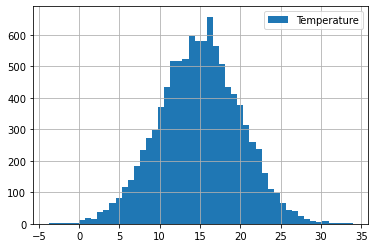

In [123]:
#Temperature histogram generation
climate_change_df.iloc[:,3].hist(legend=True,bins=50)

<AxesSubplot:>

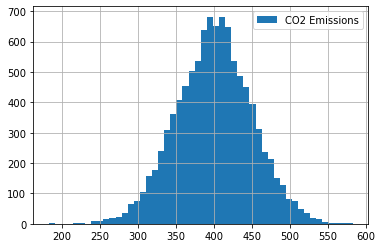

In [124]:
#CO2 histogram generation
climate_change_df.iloc[:,4].hist(legend=True,bins=50)

<AxesSubplot:>

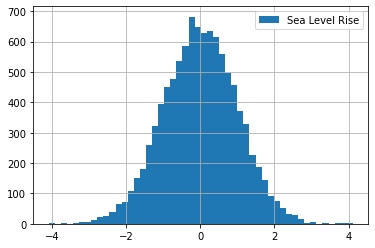

In [125]:
#Sea Level Rise histogram generation
climate_change_df.iloc[:,5].hist(legend=True,bins=50)

<AxesSubplot:>

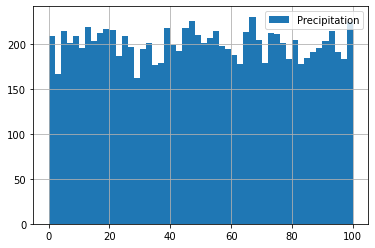

In [126]:
#Precipitation histogram generation
climate_change_df.iloc[:,6].hist(legend=True,bins=50)

<AxesSubplot:>

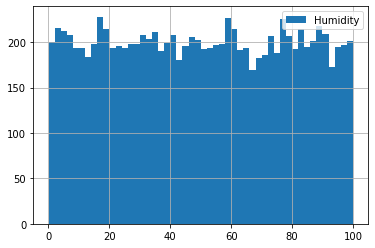

In [127]:
#Humidity histogram generation
climate_change_df.iloc[:,7].hist(legend=True,bins=50)

<AxesSubplot:>

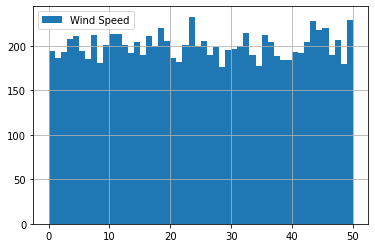

In [128]:
#Wind Speed histogram generation
climate_change_df.iloc[:,8].hist(legend=True,bins=50)

([<matplotlib.axis.YTick at 0x2bd8c0be490>,
 [Text(0, 0, 'Temperature'),
  Text(0, 1, 'CO2 Emissions'),
  Text(0, 2, 'Sea Level Rise'),
  Text(0, 3, 'Precipitation'),
  Text(0, 4, 'Humidity'),
  Text(0, 5, 'Wind Speed'),
  Text(0, 6, 'Year')])

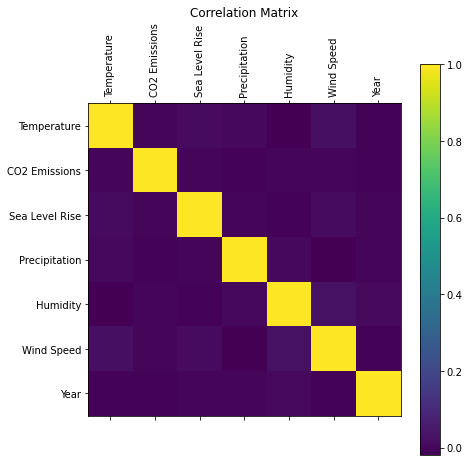

In [129]:
plt.figure(figsize=(7,7))
plt.matshow(climate_change_df.iloc[:,1:].corr(), fignum=1)
plt.title('Correlation Matrix', position = (0.5, 1.1))
plt.colorbar()
plt.xticks(range(7), list(climate_change_df.iloc[:,3:].columns), rotation = 90)
plt.yticks(range(7), list(climate_change_df.iloc[:,3:].columns))

In [130]:
#basic exploration of the yield data frame
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [132]:
yield_df.groupby(['Area','Item']).mean()

Unnamed: 0         Year    hg/ha_yield  \
Area     Item                                                       
Albania  Maize              50.304348  2001.434783   42664.782609   
         Potatoes           51.304348  2001.434783  153105.043478   
         Rice, paddy        11.000000  1991.500000   33414.250000   
         Sorghum             9.000000  1991.000000    7638.000000   
         Soybeans           52.608696  2001.434783   14175.043478   
...                               ...          ...            ...   
Zimbabwe Rice, paddy     28149.000000  2001.434783   22655.000000   
         Sorghum         28150.000000  2001.434783    3864.956522   
         Soybeans        28151.000000  2001.434783   17265.695652   
         Sweet potatoes  28152.000000  2001.434783   21368.521739   
         Wheat           28153.000000  2001.434783   43743.043478   

                         average_rain_fall_mm_per_year  pesticides_tonnes  \
Area     Item                                                               
Albania  Maize                                  1485.0         637.778696   
         Potatoes                               1485.0         637.778696   
         Rice, paddy                            1485.0         121.000000   
         Sorghum                                1485.0         121.000000   
         Soybeans                               1485.0         637.778696   
...                                                ...                ...   
Zimbabwe Rice, paddy                             657.0        3195.310435   
         Sorghum                                 657.0        3195.310435   
         Soybeans                                657.0        3195.310435   
         Sweet potatoes                          657.0        3195.310435   
         Wheat                                   657.0        3195.310435   

                          avg_temp  
Area     Item                       
Albania  Maize           16.326957  
         Potatoes        16.326957  
         Rice, paddy     15.960000  
         Sorghum         15.930000  
         Soybeans        16.326957  
...                            ...  
Zimbabwe Rice, paddy     20.831739  
         Sorghum         20.831739  
         Soybeans        20.831739  
         Sweet potatoes  20.831739  
         Wheat           20.831739  

[598 rows x 6 columns]

In [114]:
yield_df.Item

0         6704.228333
1        11713.395000
2         4491.228333
3         2685.895000
4         1769.395000
             ...     
28237     9342.971667
28238     6090.638333
28239     7770.138333
28240     9283.638333
28241     9394.805000
Name: Item, Length: 28242, dtype: float64

In [18]:
#empty check
yield_df.isnull().sum(axis = 0)

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [19]:
#duplicate check
yield_df.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
28237    False
28238    False
28239    False
28240    False
28241    False
Length: 28242, dtype: bool

In [20]:
#descriptive statistics of the yield dataset
yield_df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [21]:
#remove unnecessary column
climate_change_df = climate_change_df.drop(['Date'], axis=1)

In [22]:
#remove unnecessary column
yield_df = yield_df.drop(['Unnamed: 0'], axis=1)

In [23]:
i = 0
for col in yield_df.columns:
    print(col,'has',len(np.unique(yield_df.iloc[:,i])),'unique values')
    i+=1


Area has 101 unique values
Item has 10 unique values
Year has 23 unique values
hg/ha_yield has 11514 unique values
average_rain_fall_mm_per_year has 100 unique values
pesticides_tonnes has 1673 unique values
avg_temp has 1831 unique values


<AxesSubplot:>

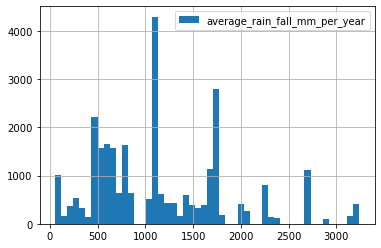

In [24]:
#yield histogram generation
yield_df.iloc[:,4].hist(legend=True,bins=50)

<AxesSubplot:>

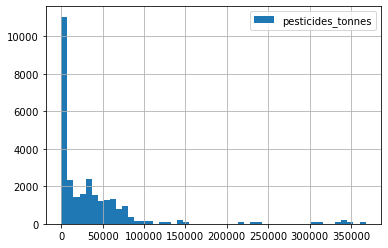

In [25]:
#average rainfall histogram generation
yield_df.iloc[:,5].hist(legend=True,bins=50)

In [26]:
# Need to average the climate change dataset because it is more granular by location when compared to the other datset.
climate_change_df_average = climate_change_df.groupby(['Country', 'Year']).mean(numeric_only=True).reset_index()

In [27]:
# Find all columns that are numeric
climate_change_df_numeric = climate_change_df_average.select_dtypes(include=[np.number])

In [28]:
# Find all columns that are numeric
yield_df_numeric = yield_df.select_dtypes(include=[np.number])

In [29]:
#outlier removal climate change
climate_change_no_outlier = climate_change_df_numeric[(np.abs(stats.zscore(climate_change_df_numeric)) < 3).all(axis=1)]

In [30]:
#outlier removal yield change
yield_df_no_outlier = yield_df_numeric[(np.abs(stats.zscore(yield_df_numeric)) < 3).all(axis=1)]

In [31]:
# Remove all rows that contained outliers
climate_change_df_average = climate_change_df.loc[climate_change_no_outlier.index]

In [32]:
# Remove all rows that contained outliers
yield_df = yield_df.loc[yield_df_no_outlier.index]

In [33]:
yield_df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


([<matplotlib.axis.YTick at 0x2bdfee228b0>,
 [Text(0, 0, 'Year'),
  Text(0, 1, 'hg/ha_yield'),
  Text(0, 2, 'average_rain_fall_mm_per_year'),
  Text(0, 3, 'pesticides_tonnes'),
  Text(0, 4, 'avg_temp')])

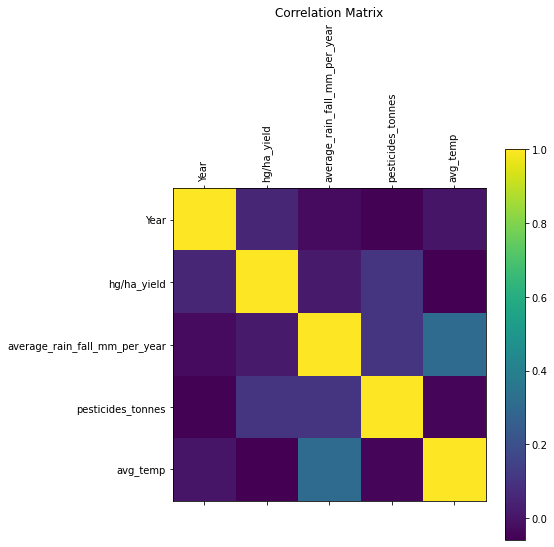

In [34]:
#look if any correlation for possible regression exercises 
plt.figure(figsize=(7,7))
plt.matshow(yield_df.iloc[:,1:].corr(), fignum=1)
plt.title('Correlation Matrix', position = (0.5, 1.1))
plt.colorbar()
plt.xticks(range(5), list(yield_df.iloc[:,2:].columns), rotation = 90)
plt.yticks(range(5), list(yield_df.iloc[:,2:].columns))

In [35]:
#merge dataset
merged_df = pd.merge(climate_change_df_average, yield_df, left_on=['Country', 'Year'], right_on=['Area', 'Year'])

In [36]:
merged_df

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,Latvia,Potatoes,145634,641.0,284.72,7.47
1,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,Latvia,Wheat,27034,641.0,284.72,7.47
2,Rachelburgh,Latvia,17.355325,275.769689,0.748323,92.541043,50.543222,19.078273,2000,Latvia,Potatoes,145634,641.0,284.72,7.47
3,Rachelburgh,Latvia,17.355325,275.769689,0.748323,92.541043,50.543222,19.078273,2000,Latvia,Wheat,27034,641.0,284.72,7.47
4,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,South Africa,Maize,28492,495.0,26857.00,20.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18430,Graychester,Australia,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,Australia,Wheat,15729,534.0,42169.39,20.33
18431,Graychester,Australia,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,Australia,Wheat,15729,534.0,42169.39,12.37
18432,Graychester,Australia,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,Australia,Wheat,15729,534.0,42169.39,14.23
18433,Graychester,Australia,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,Australia,Wheat,15729,534.0,42169.39,19.09


### Methodology

1. Explan your Deep Learning process / methodology

Before we did any modeling, we first explored and pre-processed both datasets. We checked the distribution of the data as well as for missing values and duplicates. Once we cleaned both datasets to our liking, we then combined the two for modeling purposes. Before modeling the final dataset we also did further preprocessing such as one hot encoding the features in order to make the learning process eaiser by transforming the categorical variables into binary. We also scaled the numerical values using the standard scaler in order to make the learning process easier since it balances out the wide range of values for each respective feature. 

Since our goal is to predict a continuous variable, we decided the relu activation function would be the most appropriate for our purposes and we decided upon the MSE as the appropiate measure for effectiveness as it looks at the deviation between predicted and actual values.

2. Introduce the Deep Neural Networks you used in your project
 * Model 1
    * Our first model is a sequential model that can be summarized as 5 layers; 3 dense and 2 dropout layers for 4,929 parameters. 
 
 * Model 2
    * Our second model is also a sequential model that can be summarized as 10 layers; 6 dense and 4 dropout layers for 231,361 parameters. This model builds upon our second one by incorporating the improvements suggested from the keras tuner.
 
 Both of our models are sequential models that have several layers including dropout layers. The first of which is initialized with parameters we felt would apply to our problem, and the second has refined parameters after performing model tuning.  We went with sequential models due to their simplicity and efficiency. 
 
 
3. Add keywords  
**Keywords:** sequential model, kerastuner, neural network, one hot encoding, prediction, drop out layers, adam optimizer

In [37]:
# One-hot encode country
X = pd.get_dummies(merged_df, columns=['Country'])

X = pd.get_dummies(X, columns=['Item'])

# X is all the fields that predict hg/ha_yield
X = X.drop('hg/ha_yield', axis=1)
X = X.drop('Location', axis=1)
X = X.drop('Area', axis=1)
Y = merged_df['hg/ha_yield']


In [38]:
X

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,641.0,284.72,7.47,...,0,0,0,1,0,0,0,0,0,0
1,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,641.0,284.72,7.47,...,0,0,0,0,0,0,0,0,1,0
2,17.355325,275.769689,0.748323,92.541043,50.543222,19.078273,2000,641.0,284.72,7.47,...,0,0,0,1,0,0,0,0,0,0
3,17.355325,275.769689,0.748323,92.541043,50.543222,19.078273,2000,641.0,284.72,7.47,...,0,0,0,0,0,0,0,0,1,0
4,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,495.0,26857.00,20.74,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18430,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,534.0,42169.39,20.33,...,0,0,0,0,0,0,0,0,1,0
18431,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,534.0,42169.39,12.37,...,0,0,0,0,0,0,0,0,1,0
18432,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,534.0,42169.39,14.23,...,0,0,0,0,0,0,0,0,1,0
18433,9.085795,434.270722,-2.002027,0.679430,84.277177,28.460437,2010,534.0,42169.39,19.09,...,0,0,0,0,0,0,0,0,1,0


In [39]:
# Standardize the dataset to feed into the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2)


### Model Fitting and Validation

1. Model 1 
* 3 dense layers and 2 dropout layers with the relu activation function. 
* the model also uses the Adam optimizer function

2. Model 2
* 6 dense layers and 4 dropout layers with the relu activation function. 
* the model also uses the Adam optimizer function

For both model we had a validation split of 20% and we trained for 100 epochs with a batch size of 32.

In [41]:
def build_model(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],)))

    # Create a variable number of layers between 2 and 5 along with an associated Dropout layer
    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))

    # Regression so just one unit needed
    model.add(Dense(1,activation='relu'))

    # Adjust the learning rate dynamically, go off of val_loss for mean_squared_error
    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='mean_squared_error')
    return model

In [42]:
import keras_tuner

model = build_model(keras_tuner.HyperParameters())


In [43]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3840      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
369/369 [==============================] - 1s 1ms/step - loss: 10523837440.0000 - val_loss: 10689539072.0000
Epoch 2/100
369/369 [==============================] - 0s 794us/step - loss: 10522964992.0000 - val_loss: 10688126976.0000
Epoch 3/100
369/369 [==============================] - 0s 798us/step - loss: 10520666112.0000 - val_loss: 10684818432.0000
Epoch 4/100
369/369 [==============================] - 0s 775us/step - loss: 10516265984.0000 - val_loss: 10679260160.0000
Epoch 5/100
369/369 [==============================] - 0s 775us/step - loss: 10509452288.0000 - val_loss: 10671159296.0000
Epoch 6/100
369/369 [==============================] - 0s 790us/step - loss: 10499963904.0000 - val_loss: 10660235264.0000
Epoch 7/100
369/369 [==============================] - 0s 775us/step - loss: 10487582720.0000 - val_loss: 10646332416.0000
Epoch 8/100
369/369 [==============================] - 0s 770us/step - loss: 10472105984.0000 - val_loss: 10629197824.0000
Epoch 9/100
369/36

Epoch 68/100
369/369 [==============================] - 0s 767us/step - loss: 3199988736.0000 - val_loss: 3220224768.0000
Epoch 69/100
369/369 [==============================] - 0s 760us/step - loss: 3062823936.0000 - val_loss: 3082382336.0000
Epoch 70/100
369/369 [==============================] - 0s 762us/step - loss: 2931285504.0000 - val_loss: 2948936448.0000
Epoch 71/100
369/369 [==============================] - 0s 760us/step - loss: 2805942528.0000 - val_loss: 2822378496.0000
Epoch 72/100
369/369 [==============================] - 0s 762us/step - loss: 2686927616.0000 - val_loss: 2702369280.0000
Epoch 73/100
369/369 [==============================] - 0s 764us/step - loss: 2574467072.0000 - val_loss: 2588181248.0000
Epoch 74/100
369/369 [==============================] - 0s 784us/step - loss: 2468764416.0000 - val_loss: 2482091264.0000
Epoch 75/100
369/369 [==============================] - 0s 794us/step - loss: 2370174208.0000 - val_loss: 2382274304.0000
Epoch 76/100
369/369 [==

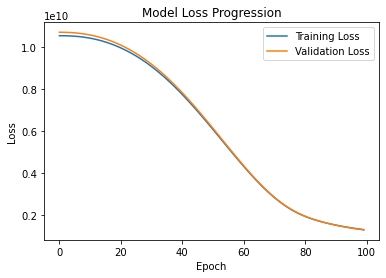

In [44]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=32)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Model Evaluation 

* Examine your models (coefficients, parameters, errors, etc...)
* Our initial model has 4,929 trainable parametsrs and is comprised of 5 layers.

* Compute and interpret your results in terms of accuracy, precision, recall, ROC etc. 
* We use the MSE as our evaluation metric due to the nature of us aiming to predict a continuous value. As the MSE can be quite high, we take the square root to get a better understanding of our errror. With the inital model the MSE for the training and validation were ~1,287,590,656 and ~1,274,160,768 respectively. After taking the square root we get ~35,883 and ~35,695 respectively. While this isn't too bad as it's well within the standard deviation and means of the yield across all crops and locations, we still think there is room for improvement. As a result we run the kerastuner and then use the suggested outputs to further tune. 
* Upon running the keras tuner we are able to get the training and validation MSE to ~155,843,456 and ~210,459,728 respectively. Upon taking the square root we get ~12,483 and ~14,507 which is a significant improvement

In [45]:
model.save_weights('./checkpoints/model1_weights')

In [46]:
# Find the optimal hyperparameters via keras tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=160,
    executions_per_trial=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

Reloading Tuner from .\untitled_project\tuner0.json


In [47]:
tuner.search(X_train, Y_train, validation_split=0.2, epochs=20, batch_size=32)
best_model = tuner.get_best_models(num_models=1)[0]


In [48]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 074 summary
Hyperparameters:
num_layers: 2
units_0: 384
dropout_0: 0.0
units_1: 192
dropout_1: 0.2
learning_rate: 0.007279565485545583
units_2: 96
dropout_2: 0.4
units_3: 480
dropout_3: 0.4
units_4: 96
dropout_4: 0.1
Score: 77010368.0

Trial 076 summary
Hyperparameters:
num_layers: 4
units_0: 512
dropout_0: 0.0
units_1: 320
dropout_1: 0.1
learning_rate: 0.0002931888815232689
units_2: 512
dropout_2: 0.1
units_3: 352
dropout_3: 0.1
units_4: 352
dropout_4: 0.1
Score: 79950168.0

Trial 152 summary
Hyperparameters:
num_layers: 5
units_0: 320
dropout_0: 0.2
units_1: 256
dropout_1: 0.0
learning_rate: 0.0007129239549612552
units_2: 32
dropout_2: 0.0
units_3: 448
dropout_3: 0.0
units_4: 320
dropout_4: 0.2
Score: 80740376.0

Trial 146 summary
Hyperparameters:
num_layers: 4
units_0: 384
dropout_0: 0.0
units_1: 448
dropout_1: 0.30000000000000004
learning_rate: 0.00097278287299031

Epoch 1/100
369/369 [==============================] - 2s 2ms/step - loss: 2469236224.0000 - val_loss: 643076672.0000
Epoch 2/100
369/369 [==============================] - 1s 2ms/step - loss: 669968064.0000 - val_loss: 339649280.0000
Epoch 3/100
369/369 [==============================] - 1s 2ms/step - loss: 422761024.0000 - val_loss: 203828016.0000
Epoch 4/100
369/369 [==============================] - 1s 2ms/step - loss: 338657728.0000 - val_loss: 304101024.0000
Epoch 5/100
369/369 [==============================] - 1s 2ms/step - loss: 318145376.0000 - val_loss: 159965728.0000
Epoch 6/100
369/369 [==============================] - 1s 2ms/step - loss: 304430048.0000 - val_loss: 156315568.0000
Epoch 7/100
369/369 [==============================] - 1s 2ms/step - loss: 273958208.0000 - val_loss: 139158672.0000
Epoch 8/100
369/369 [==============================] - 1s 2ms/step - loss: 261733104.0000 - val_loss: 168965344.0000
Epoch 9/100
369/369 [==============================] - 1s 2ms/s

Epoch 71/100
369/369 [==============================] - 1s 2ms/step - loss: 194911328.0000 - val_loss: 75098696.0000
Epoch 72/100
369/369 [==============================] - 1s 2ms/step - loss: 187595520.0000 - val_loss: 67392360.0000
Epoch 73/100
369/369 [==============================] - 1s 2ms/step - loss: 185300880.0000 - val_loss: 81544712.0000
Epoch 74/100
369/369 [==============================] - 1s 2ms/step - loss: 190063424.0000 - val_loss: 150339072.0000
Epoch 75/100
369/369 [==============================] - 1s 2ms/step - loss: 183571616.0000 - val_loss: 114869704.0000
Epoch 76/100
369/369 [==============================] - 1s 2ms/step - loss: 184220144.0000 - val_loss: 69791768.0000
Epoch 77/100
369/369 [==============================] - 1s 2ms/step - loss: 183836816.0000 - val_loss: 99184072.0000
Epoch 78/100
369/369 [==============================] - 1s 2ms/step - loss: 173502048.0000 - val_loss: 89807560.0000
Epoch 79/100
369/369 [==============================] - 1s 2ms

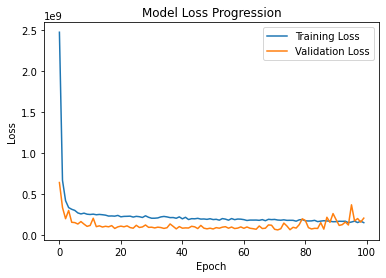

In [49]:
# Best model based on keras tuner
model = Sequential()

model.add(Dense(384, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(192, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(96, activation='relu', kernel_regularizer=l1(0.1)))
model.add(Dropout(0.4))
model.add(Dense(480, activation='relu', kernel_regularizer=l1(0.1)))
model.add(Dropout(0.4))
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=32)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [50]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 384)               46080     
                                                                 
 dense_4 (Dense)             (None, 192)               73920     
                                                                 
 dropout_2 (Dropout)         (None, 192)               0         
                                                                 
 dense_5 (Dense)             (None, 96)                18528     
                                                                 
 dropout_3 (Dropout)         (None, 96)                0         
                                                                 
 dense_6 (Dense)             (None, 480)               46560     
                                                                 
 dropout_4 (Dropout)         (None, 480)              

In [51]:
model.save_weights('./checkpoints/model2_weights')

### Issues / Improvements
1. The kerastuner suggested several additional layers and recommended tweaks which we implemented and that dramatically improved performance.
2. Ultimately our datasets are limited in nature and more data would likely greatly increase the accuracy of our models by reducing the error. Furthermore, there are likely way more feautres that impact food scarcity and we only have small portion of them


###  References
Balashankar, A., Subramanian, L., & Fraiberger, S. P. (2023). Predicting food crises using news streams. Science Advances, 9(9), eabm3449. https://doi.org/10.1126/sciadv.abm3449 

Choi, S., & Bae, B. (2015). The Real-Time Monitoring System of Social Big Data for Disaster Management. In J. J. (Jong H. Park, I. Stojmenovic, H. Y. Jeong, & G. Yi (Eds.), Computer Science and its Applications (pp. 809–815). Springer. https://doi.org/10.1007/978-3-662-45402-2_115 

Christensen, C., Wagner, T., & Langhals, B. (2021). Year-Independent Prediction of Food Insecurity Using Classical and Neural Network Machine Learning Methods. AI, 2(2), Article 2. https://doi.org/10.3390/ai2020015 

Gregory, P. j, Ingram, J. s. i, & Brklacich, M. (2005). Climate change and food security. Philosophical Transactions of the Royal Society B: Biological Sciences, 360(1463), 2139–2148. https://doi.org/10.1098/rstb.2005.1745 

Goyal, A. (2023, May 26). Climate insights dataset. Kaggle. https://www.kaggle.com/datasets/goyaladi/climate-insights-dataset 

￼ 

Lukyamuzi, A., Ngubiri, J., & Okori, W. (2018). Tracking Food Insecurity from Tweets Using Data Mining Techniques. 2018 IEEE/ACM Symposium on Software Engineering in Africa (SEiA), 27–34. https://ieeexplore.ieee.org/document/8596349/references#references 

Patel, R. (2021, December 1). Crop yield prediction dataset. Kaggle. https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset 

￼ 

Okori, W., & Obua, J. (2011). Machine Learning Classification Technique for Famine Prediction. 

￼ 

P 
	

### Credits

> We primarily leveraged the Keras API documentation in order to understand how to properly use the libary for our project.

In [90]:
predict = pd.read_csv('./data/predictions.csv')

In [92]:
predict.head()
#Latvia, Australia and Mali respectively.. predicting yield in 2025 for potatoes, wheet and rice respectively

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,10.688986,403.118902,0.717506,13.835237,23.631256,18.492026,2025,641,284.72,7.47,...,0,0,0,1,0,0,0,0,0,0
1,19.730800,448.180275,0.001415,93.360755,21.526350,29.993495,2025,534,33475.00,14.32,...,0,0,0,0,0,0,0,0,1,0
2,10.874589,415.608633,1.218314,57.990681,15.764407,10.098797,2025,282,17.59,27.51,...,0,0,0,0,1,0,0,0,0,0


In [99]:
X1 = scaler.fit_transform(predict)

In [100]:
model.predict(X1)

1/1 [==============================] - 0s 14ms/step


array([[62463.42 ],
       [ 4936.227],
       [10435.447]], dtype=float32)

In [57]:
# End of Project